## QUESTION 3


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import pandas as pd
from sklearn.datasets import load_iris

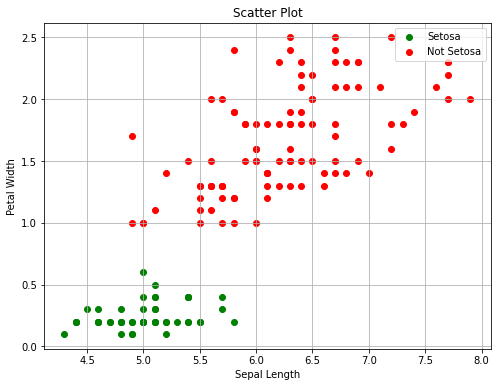

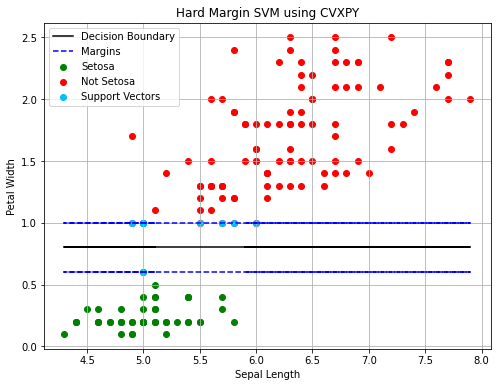

In [13]:
#Applying SVM to the Dataset
#Loading the dataset
iris = load_iris()
X = iris.data
Y = iris.target

#Extracting the required features
X = X[:,(True,False,False,True)]

#Divinding the classes as sentosa and not-sentosa
for i in range(Y.size):
  if Y[i]==0:
    Y[i]=1
  else:
    Y[i]=-1

X_setosa = X[Y==1]
X_not_setosa = X[Y==-1]

#Plotting of the graph
plt.figure(figsize=(8, 6))
plt.scatter(X_setosa[:,0],X_setosa[:,1],color = 'g',label='Setosa')
plt.scatter(X_not_setosa[:,0],X_not_setosa[:,1],color = 'r',label = 'Not Setosa')
plt.grid()
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.title("Scatter Plot")
plt.legend()
plt.show()

#Solving the optimization problem using the library cvxpy
n = np.size(X,0)
w = cp.Variable(2)
b = cp.Variable()
constraints = []

for i in range(n):
  constraints += [Y[i]*(X[i]*w+b)>=1]

objective_fn = cp.Minimize(0.5*cp.pnorm(w,p=2)**2)
problem = cp.Problem(objective_fn,constraints)
problem.solve()

#Using the w and b values to get the hyperplane
X1 = X[:,0]
X2 = -1*(b.value + w.value[0]*X1)/w.value[1]
SV1 = -1*(b.value + 1 + w.value[0]*X1)/w.value[1]
SV2 = -1*(b.value - 1 + w.value[0]*X1)/w.value[1]

#Plotting of the graph
plt.figure(figsize=(8, 6))
plt.scatter(X_setosa[:,0],X_setosa[:,1],color = 'g',label='Setosa')
plt.scatter(X_not_setosa[:,0],X_not_setosa[:,1],color = 'r',label = 'Not Setosa')
plt.plot(X1,X2,color = 'black',linestyle = 'solid', label='Decision Boundary')
plt.plot(X1,SV1,color = 'blue',linestyle = 'dashed', label='Margins')
plt.plot(X1,SV2,color = 'blue',linestyle = 'dashed')

#Extracting the support vectors
sv_x = []
sv_y = []
for i in range(np.size(Y)):
    if abs((w.value[0]*X[i,0]) + (w.value[1]*X[i,1]) + b.value - 1) <= 1e-5:
        sv_x.append(X[i,:])
        sv_y.append(Y[i])
    if abs((w.value[0]*X[i,0]) + (w.value[1]*X[i,1]) + b.value + 1) <= 1e-5:
        sv_x.append(X[i,:])
        sv_y.append(Y[i])
sv_x = np.array(sv_x)
sv_y  = np.array(sv_y)

#Plotting the support vectors 
plt.scatter(sv_x[:,0],sv_x[:,1],color = 'deepskyblue',marker = 'o',label = 'Support Vectors')
plt.grid()
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.title("Hard Margin SVM using CVXPY")
plt.legend()
plt.show()

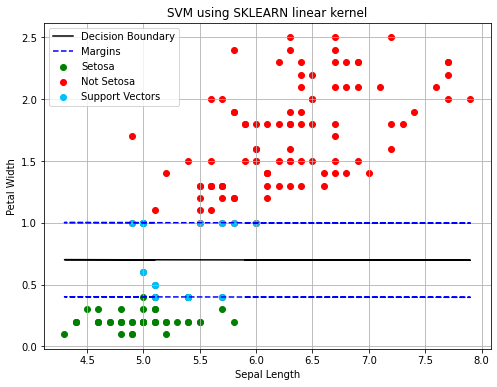

In [14]:
#Using SVM function from Sklearn
from sklearn.svm import SVC

#fitting the data
clf = SVC(gamma = 'auto',kernel = 'linear')
clf.fit(X,Y)

#Using the values from sklearn function, the eqns of hyperplane is calculated
X1 = X[:,0]
X2 = -1*(clf.intercept_[0] + clf.coef_[0,0]*X1)/clf.coef_[0,1]
SV1 = -1*(clf.intercept_[0] + 1 + clf.coef_[0,0]*X1)/clf.coef_[0,1]
SV2 = -1*(clf.intercept_[0] - 1 + clf.coef_[0,0]*X1)/clf.coef_[0,1]

#plotting of the graph
plt.figure(figsize=(8, 6))
plt.scatter(X_setosa[:,0],X_setosa[:,1],color = 'g',label = 'Setosa')
plt.scatter(X_not_setosa[:,0],X_not_setosa[:,1],color = 'r',label = 'Not Setosa')
plt.plot(X1,X2,color = 'black',linestyle = 'solid', label='Decision Boundary')
plt.plot(X1,SV1,color = 'blue',linestyle = 'dashed', label='Margins')
plt.plot(X1,SV2,color = 'blue',linestyle = 'dashed')

#plotting the support vectors
xx = []
yy = []
for i in clf.support_:
    xx.append(X[i,0])
    yy.append(X[i,1])
plt.scatter(xx,yy,marker = 'o',color = 'deepskyblue',label = 'Support Vectors')
plt.grid()
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.title("SVM using SKLEARN linear kernel")
plt.legend()
plt.show()

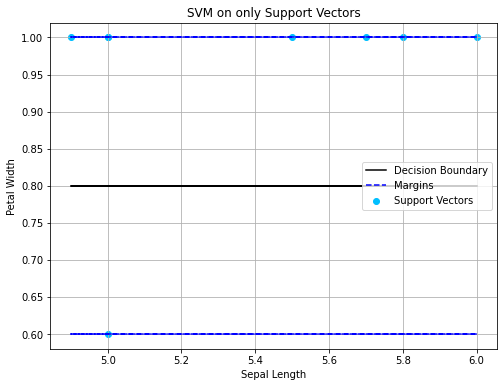

In [15]:
#Applying SVM only on the Support Vectors
X = sv_x
Y =  sv_y
#Solving the optimization problem using the library cvxpy
n = np.size(X,0)
w = cp.Variable(2)
b = cp.Variable()
constraints = []

for i in range(n):
  constraints += [Y[i]*(X[i]*w+b)>=1]

objective_fn = cp.Minimize(0.5*cp.pnorm(w,p=2)**2)
problem = cp.Problem(objective_fn,constraints)
problem.solve()

#Using the w and b values to get the hyperplane
X1 = X[:,0]
X2 = -1*(b.value + w.value[0]*X1)/w.value[1]
SV1 = -1*(b.value + 1 + w.value[0]*X1)/w.value[1]
SV2 = -1*(b.value - 1 + w.value[0]*X1)/w.value[1]

#Plotting of the graph
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0],X[:,1],color = 'deepskyblue',marker = 'o',label='Support Vectors')
plt.plot(X1,X2,color = 'black',linestyle = 'solid', label='Decision Boundary')
plt.plot(X1,SV1,color = 'blue',linestyle = 'dashed', label='Margins')
plt.plot(X1,SV2,color = 'blue',linestyle = 'dashed')
plt.legend(loc=5)
plt.grid()
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.title("SVM on only Support Vectors")
plt.show()